<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_4_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buat Gamma Correction sesuai dengan petunjuk berikut

In [31]:
from __future__ import print_function
import numpy as np
import argparse
import cv2 as cv
from google.colab.patches import cv2_imshow

In [32]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

In [33]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv.LUT(image, table)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


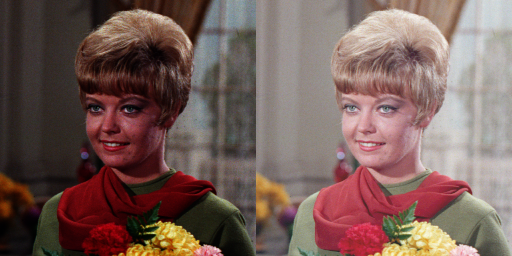

In [34]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gammaInput = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

adjusted = adjust_gamma(img, gamma=gammaInput)
cv2_imshow(np.hstack([img, adjusted]))

2. Buat Simulasi Image Depth

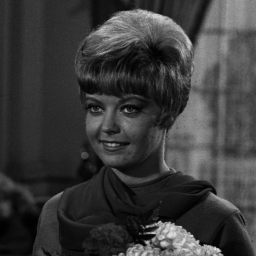

In [58]:
img2 = img.copy()
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

bit_depth=10
level = 255 / (pow(2,bit_depth)-1)
depth_image = np.zeros(img2.shape, img2.dtype)

cv2_imshow(img2)

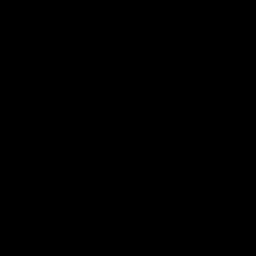

In [59]:
cv2_imshow(depth_image)

4

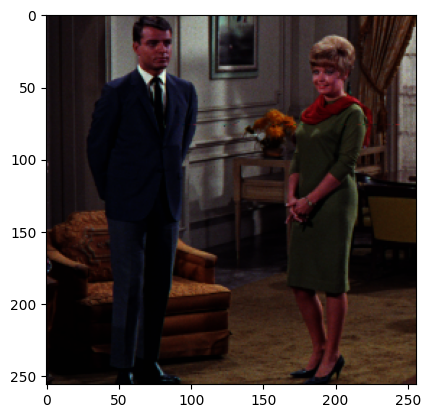

In [39]:
import matplotlib.pyplot as plt
imgCouple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')
imgCouple = cv.cvtColor(imgCouple, cv.COLOR_BGR2RGB)
plt.imshow(imgCouple)

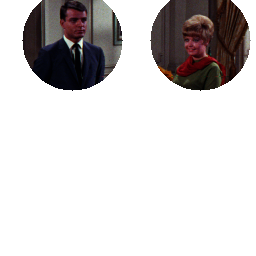

In [50]:
mask = np.zeros(imgCouple.shape, dtype=np.uint8)
mask = cv.circle(mask, (72, 40), 50, (255,255,255), -1)
mask = cv.circle(mask, (200, 40), 50, (255,255,255), -1)

# Mask input imgCouple with binary mask
result = cv.bitwise_and(imgCouple, mask)
# Color background white
result[mask==0] = 255

result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv2_imshow(result)